## Overview
This notebook provides instructions on how to use scDGRN to reconstruct dynamic GRNs. Taking the aging process of mouse brain cells (aged_opc) as an example, given the limited prior knowledge of the regulation of brain cells, the transfer learning method was adopted to infer the dynamic GRNs of mouse brain cells. First, a unified representation model was trained using the publicly available prior network from NicheNet (Browaeys et al., Nat.Methods, 2020). Subsequently, the model was fine-tuned by using the limited prior regulatory data collected about normal mouse brain cells. This method helps to reconstruct the fine-grained developmental dynamics of the cell lineage during the aging stage. The following are the input files that need to be prepared, and we have provided basic sample data in the corresponding folder:

* **./Transfer_learning/aged_opc/TF.csv**：the focused transcription factors.
* **./Transfer_learning/aged_opc/Target.csv**：target gene list, generally, the top highly variable genes are selected for analysis.
* **./Transfer_learning/aged_opc/Train_set_TL.csv**：the collected prior regulations that can be used for pre-training. The gene names need to be mapped to the corresponding index numbers of the target gene list.
* **./Transfer_learning/aged_opc/fine_tune.csv**：The collected prior regulations that can be used for fine-tuning.
* **./Transfer_learning/aged_opc/ag_opc4_expression0/1/2/3.csv**：time-series single-cell expression data. This dataset is divided into four fine-grained stages based on the literature of the dataset or through pseudo-time-series clustering.

### 1. Model training

In [2]:
%run dgrn_main_brain.py

torch.Size([4255, 4255])
Epoch:1 train loss:128.6076764166355
Epoch:2 train loss:123.18739807605743
Epoch:3 train loss:122.44749268889427
Epoch:4 train loss:122.61003163456917
Epoch:5 train loss:122.48387160897255
Epoch:6 train loss:122.64068964123726
Epoch:7 train loss:122.62419587373734
Epoch:8 train loss:122.66903692483902
Epoch:9 train loss:122.47797545790672
Epoch:10 train loss:122.8776445388794
Epoch:11 train loss:122.38023737072945
Epoch:12 train loss:122.27654695510864
Epoch:13 train loss:122.19948875904083
Epoch:14 train loss:122.82929944992065
Epoch:15 train loss:122.82562232017517
Epoch:1 train loss:5.529319077730179
Epoch:2 train loss:5.511305451393127
Epoch:3 train loss:5.516810894012451
Epoch:4 train loss:5.629577159881592
Epoch:5 train loss:5.557023048400879
Epoch:6 train loss:5.510446846485138
Epoch:7 train loss:5.584570646286011
Epoch:8 train loss:5.48727548122406
Epoch:9 train loss:5.4950515031814575
Epoch:10 train loss:5.43173810839653
Epoch:11 train loss:5.531148135

### 2. Reconstructing the dynamic gene regulatory networks
Due to the differences in computing devices and versions of Python packages, the results obtained may have slight variations. You can directly load the model we trained on CUDA 11.4, Python 3.8, and PyTorch 1.12.1, which is located in the file "./model/ag_opc.pkl".

In [5]:
## Reconstruct the GRN at the t-th time point
%run output_mb_GRNs.py

   TF  Target     score
0   0      70  0.791387
1   0      71  0.789442
2   0      72  0.790514
3   0      73  0.790964
4   0      74  0.789863


/home/llliu/dynGRN/scDGRN/output_mb_GRNs.py:403: PerformanceWarning: indexing past lexsort depth may impact performance.
  if index_to_check in df2_dict:


The GRN at time t4 is:
           TF   Target     score  e_type
136724  NR1H2    GPR22  0.810246       1
137807  NR1H2   USP27X  0.810125       1
134143  NR1H2  NECTIN4  0.809603       1
134713  NR1H2     ENHO  0.809366       1
270644  SCRT2    GPR22  0.809281       1
...       ...      ...       ...     ...
35459    PAX6  SLC38A7  0.804389       1
269610  SCRT2   POLR3E  0.804389       1
52622    ESR1     IGF1  0.804389       0
190304   ELF2  SLC38A7  0.804388       1
159720   E2F5    MOV10  0.804388       1

[3000 rows x 4 columns]
The reconstructed dynamic GRNs have been saved to: ./Transfer_learning/aged_opc/


/home/llliu/dynGRN/scDGRN/output_mb_GRNs.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['TF'] = tf_name
/home/llliu/dynGRN/scDGRN/output_mb_GRNs.py:411: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Target'] = target_name
/home/llliu/dynGRN/scDGRN/output_mb_GRNs.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

### 3. Identification of key genes based on dynamic GRNs

In [26]:
import numpy as np
import pandas as pd
df1 = pd.read_csv("./Transfer_learning/aged_opc/ag_opc_prediction0_3000.csv")
df2 = pd.read_csv("./Transfer_learning/aged_opc/ag_opc_prediction1_3000.csv")
df3 = pd.read_csv("./Transfer_learning/aged_opc/ag_opc_prediction2_3000.csv")
df4 = pd.read_csv("./Transfer_learning/aged_opc/ag_opc_prediction3_3000.csv")
result1= [(row[0], row[1]) for row in df1.values]
result2= [(row[0], row[1]) for row in df2.values]
result3= [(row[0], row[1]) for row in df3.values]
result4= [(row[0], row[1]) for row in df4.values]
network_list = [result1,result2,result3,result4]
g1 = list(set(list(df1["TF"].values)+list(df1["Target"].values)))
g2 = list(set(list(df2["TF"].values)+list(df2["Target"].values)))
g3 = list(set(list(df3["TF"].values)+list(df3["Target"].values)))
g4 = list(set(list(df4["TF"].values)+list(df4["Target"].values)))

all_genes  = list(set(g1+g2+g3+g4))
#print(all_genes)
gene_len = len(all_genes)
print(len(all_genes))

from collections import Counter
import math

def calculate_entropy(network):
    all_nodes = [node for edge in network for node in edge]
    node_degrees = dict(Counter(all_nodes))
    total_nodes = len(node_degrees)
    degree_counts = dict(Counter(node_degrees.values()))
    entropy = 0
    for degree in degree_counts.values():
        #degree_count = list(node_degrees.values()).count(degree)
        probability = degree / total_nodes
        entropy -= probability * math.log2(probability)

    return entropy

def remove_gene_and_edges(network, gene):
    modified_network = [edge for edge in network if gene not in edge]
    return modified_network

entropy_list = [calculate_entropy(network) for network in network_list]
#
mean_entropy = np.mean(entropy_list)
std_entropy = np.std(entropy_list)

gene_scores = {}
for gene in all_genes:  #
    #print("!!")
    perturbation_values = []
    for i, network in enumerate(network_list):
        modified_network = remove_gene_and_edges(network, gene)

        modified_entropy = calculate_entropy(modified_network)
        perturbation_values.append(modified_entropy)

    mean_perturbation = np.mean(perturbation_values)
    std_perturbation = np.std(perturbation_values)

    R = abs(mean_perturbation - mean_entropy) * abs(std_perturbation - std_entropy)
    #R = abs(std_perturbation - std_entropy)
    #R = abs(mean_perturbation - mean_entropy)
    gene_scores[gene] = R

sorted_genes = sorted(gene_scores.items(), key=lambda x: x[1], reverse=True)
print(sorted_genes[:20])
df = pd.DataFrame(sorted_genes,columns=['gene','R_score'])
print(df)

gene_index = df['gene'][:20].values.tolist()
print(gene_index)
df.to_csv("./Transfer_learning/aged_opc/key_gene.csv",index=False)

678
[('NR1H2', 0.020995406307427845), ('MAFB', 0.012050748255772414), ('BCL11B', 0.005154164559590252), ('SCRT2', 0.0034876357791800024), ('NFIB', 0.0026981941727487477), ('DLX2', 0.0026648599944108947), ('SCRT1', 0.0021075206482333336), ('DLX6', 0.00137408637882547), ('NEUROD2', 0.0012291130699370735), ('MYT1L', 0.001150996889449488), ('NR3C1', 0.0010358693659866028), ('DLX1', 0.0010355242558769337), ('GLIS2', 0.0005100265070130992), ('TCF4', 0.00048739458239417573), ('POU3F4', 0.00048215670585637066), ('NPRL2', 0.0003997579501314948), ('KLF6', 0.00037819087422797575), ('EPDR1', 0.0003357118205770997), ('GLIS3', 0.00031762881871065746), ('IQCD', 0.00030234239201219206)]
          gene       R_score
0        NR1H2  2.099541e-02
1         MAFB  1.205075e-02
2       BCL11B  5.154165e-03
3        SCRT2  3.487636e-03
4         NFIB  2.698194e-03
..         ...           ...
673     KCNJ11  1.676087e-09
674     PCYT1A  1.676087e-09
675     HNRNPM  1.676087e-09
676  C1GALT1C1  1.676087e-09
6

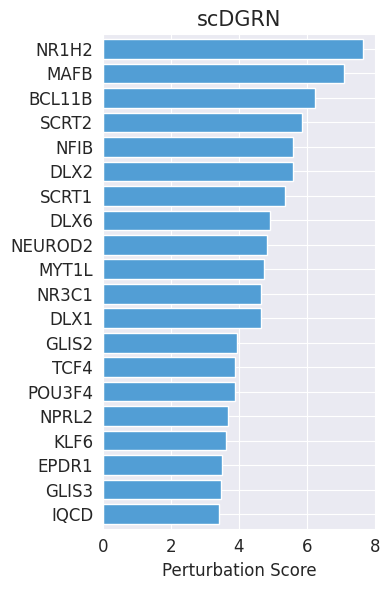

In [1]:
## Draw a horizontal bar chart of key genes
import pandas as pd
import matplotlib.pyplot as plt
df_tf = pd.read_csv("./Transfer_learning/aged_opc/TF.csv")
df_target = pd.read_csv("./Transfer_learning/aged_opc/Target.csv")
dic_index_gene = df_target.set_index("index")["Gene"].to_dict()
sorted_df = pd.read_csv("./Transfer_learning/aged_opc/key_gene.csv")
gene_list = []
for i in list(sorted_df["gene"].values):
    gene_list.append(i)
sorted_df["gene"] = gene_list
top_20_genes = sorted_df['gene'].head(20)
#top_20_genes = sorted_df['gene'].head(100)
top_20_genes = top_20_genes.str.upper()
top_20_genes.to_csv("./Transfer_learning/aged_opc/top20_gene_pertur.csv",index=False)
import numpy as np
top_20_scores = sorted_df['R_score'].head(20)
#top_20_scores = sorted_df['R_score'].head(100)
top_20_scores = np.log(top_20_scores * 100000)
fig, ax = plt.subplots()
#'#529ed5','#ffff00','#f8931f','#01fff8','#ea1e7b','#009343'
bars = ax.barh(top_20_genes, top_20_scores, color='#529ed5')
ax.invert_yaxis()
ax.set_xlabel('Perturbation Score',fontsize=12)
ax.margins(y=0.01)
#ax.set_ylabel('Genes')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.set_title('scDGRN',fontsize=15)
fig.set_size_inches(4, 6)
plt.tight_layout()
#plt.savefig('./figure/key_gene_hEry.pdf',format='pdf')
#plt.show()

### 4. Gene module identification and enrichment analysis
Suppose you currently have a set of regulon modules: g_list. You can directly obtain the enrichment analysis results of this module by gseapy package using the following code.

In [1]:
import gseapy as gp
g_list = ['PPARA', 'YBX1', 'UBB', 'NBPF19', 'SPI1', 'ZNF143', 'ATF1', 'ADGRA3', 'TFAP2A', 'ATF3', 'ADGRE2', 'STAT3', 'MAFK', 'HNF4A', 'TENT4A', 'TUT4', 'GASK1B', 'NORAD', 'CTCF', 'ILF3-DT', 'JUND', 'EGR1', 'ADA2', 'TMEM268', 'C8orf31', 'MYC', 'C3orf67', 'MAFG', 'YBX1', 'KLF11', 'SREBF2', 'SMIM25', 'AR', 'KDM5B', 'NFATC1', 'ODC1-DT', 'FOSL1', 'CCN2', 'TCF3']
count = 0
enr = gp.enrichr(gene_list=g_list,
                 #gene_sets='KEGG_2016',
                 #gene_sets='KEGG_2021_Human',
                 gene_sets='GO_Biological_Process_2023',
                 #gene_sets = 'Reactome_2022',
                 organism='Human',
                 #organism='Mouse',
                 cutoff=0.05)

significant_results = enr.res2d[enr.res2d['Adjusted P-value'] < 0.05]
print(significant_results.columns)
print(significant_results['Term'].head(5))
print(significant_results['Overlap'].head(5))
et = list(significant_results['Term'].values)
pv = list(significant_results['Adjusted P-value'].values)
olap = list(significant_results['Overlap'].values)
GO_num = len(enr.res2d[enr.res2d['Adjusted P-value'] < 0.05])
enriched_genesets = list(significant_results['Genes'].values)

print("Term:{}".format(et))
print("Adjusted P-value:{}".format(pv))
print("Overlap:{}".format(olap))
print("enriched_genesets:{}".format(enriched_genesets))
print("There are a total of {} enrichment terms".format(GO_num))

Index(['Gene_set', 'Term', 'Overlap', 'P-value', 'Adjusted P-value',
       'Old P-value', 'Old Adjusted P-value', 'Odds Ratio', 'Combined Score',
       'Genes'],
      dtype='object')
0    Positive Regulation Of DNA-templated Transcrip...
1    Positive Regulation Of Transcription By RNA Po...
2    Regulation Of Transcription By RNA Polymerase ...
3    Regulation Of DNA-templated Transcription (GO:...
4    Negative Regulation Of Transcription By RNA Po...
Name: Term, dtype: object
0    17/1243
1     15/938
2    20/2028
3    19/1922
4     13/763
Name: Overlap, dtype: object
Term:['Positive Regulation Of DNA-templated Transcription (GO:0045893)', 'Positive Regulation Of Transcription By RNA Polymerase II (GO:0045944)', 'Regulation Of Transcription By RNA Polymerase II (GO:0006357)', 'Regulation Of DNA-templated Transcription (GO:0006355)', 'Negative Regulation Of Transcription By RNA Polymerase II (GO:0000122)', 'Regulation Of miRNA Transcription (GO:1902893)', 'Negative Regulation Of D

### 5. Co-regulation analysis
Some collaborating TFs can be identified by dynamic gene regulatory networks, such as certain TFs regulating the same group of target genes, the two TF regulons have a high overlap ratio. Analyzing the heatmap of regulon overlap rate at each timepoint, we expect to find out the TF regulons that continue to collaborate in the early or late stage of aging.

reading data: ./Transfer_learning/aged_opc/ag_opc_prediction0_3000.csv
Construct TF-target gene mapping...
Filter out TFs with 6 target genes that are less than 5
Filtered TF: POU3F2, ETV6, FOXN2, SCRT2, SCRT1, KLF12
60 qualified TFS have been retained
Calculate the overlap rate matrix...
Perform hierarchical clustering...
[[1.         0.90336134 0.69302326 ... 0.06976744 0.06511628 0.06511628]
 [0.90336134 1.         0.62605042 ... 0.06302521 0.05882353 0.05882353]
 [0.69302326 0.62605042 1.         ... 0.10067114 0.09395973 0.09395973]
 ...
 [0.06976744 0.06302521 0.10067114 ... 1.         0.93333333 0.93333333]
 [0.06511628 0.05882353 0.09395973 ... 0.93333333 1.         1.        ]
 [0.06511628 0.05882353 0.09395973 ... 0.93333333 1.         1.        ]]
The calculation is completed. The total time consumed: 0.02s
Draw a heat map...


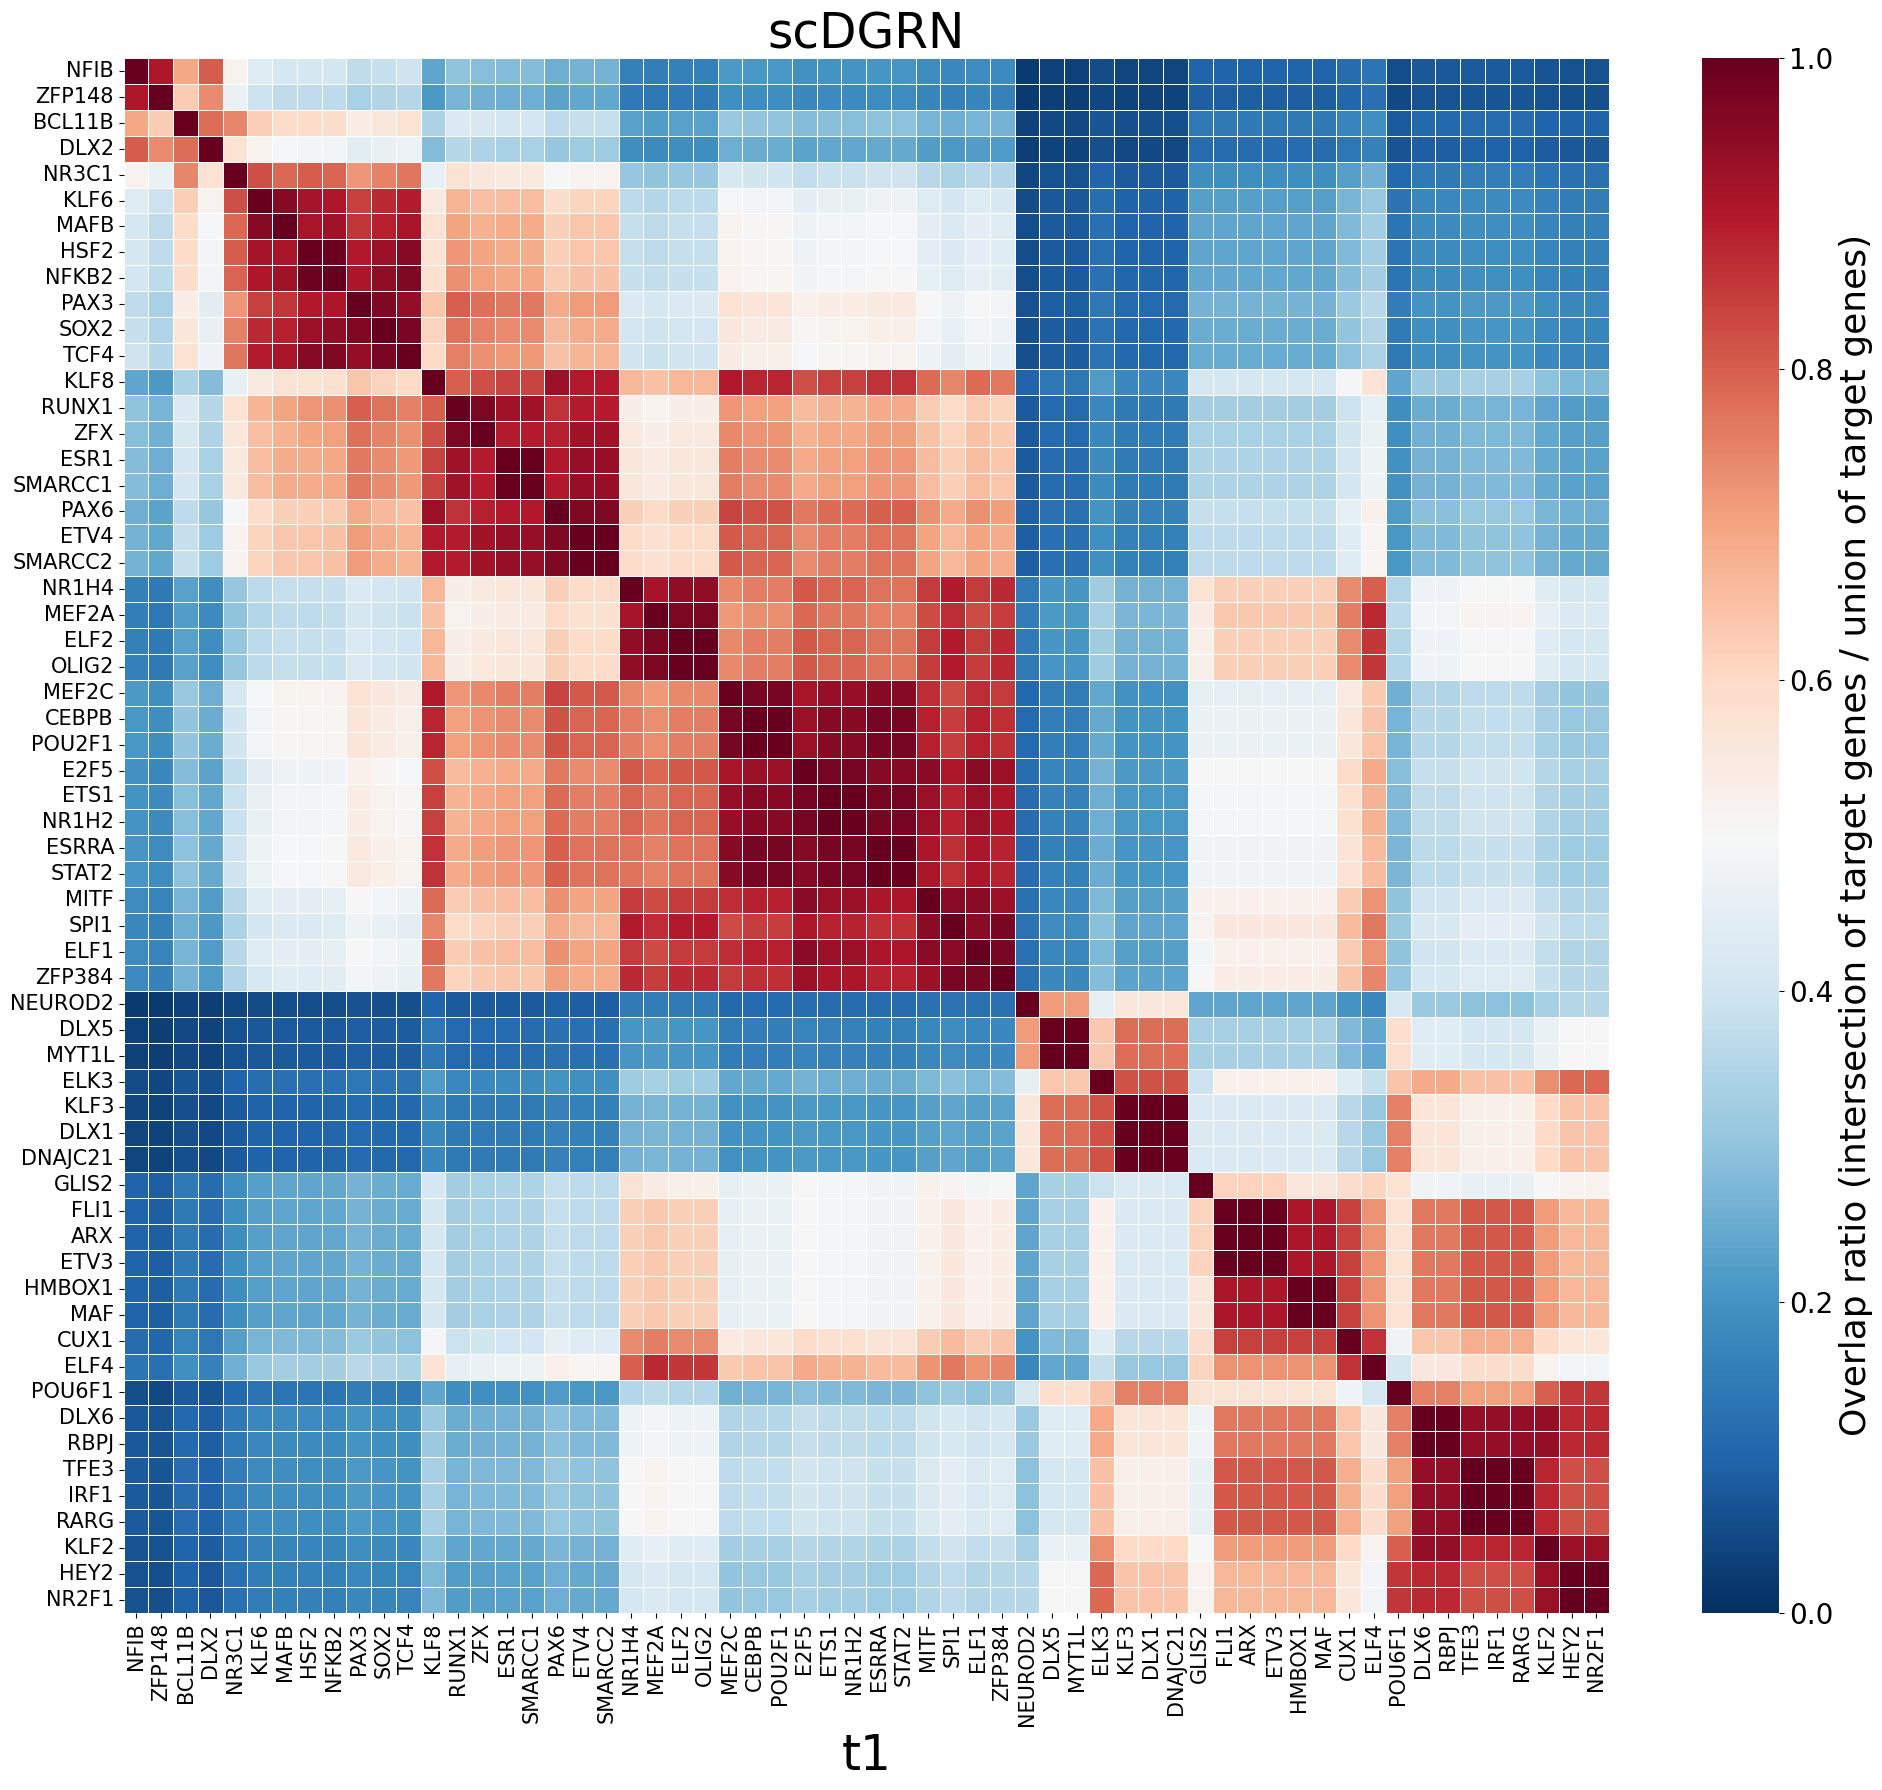

In [13]:
## Draw a heatmap for TF co-regulation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, leaves_list
import numpy as np
import time
def calculate_tf_overlap_heatmap(csv_path, figsize=(20, 18), title="Heat map of TF-regulated network overlap rate",
                                 cmap='RdBu_r', save_path=None, min_targets=2):
    """
    Calculate the overlap rate of target genes of each pair of TFS in the TF regulatory network and generate a heat map
    """
    start_time = time.time()
    print(f"reading data: {csv_path}")
    try:
        #
        df = pd.read_csv(csv_path)
        if 'TF' not in df.columns or 'Target' not in df.columns:
            #
            print("The 'TF' and 'Target' columns were not found. Try reading them without the header...")
            df = pd.read_csv(csv_path, header=None, names=['TF', 'Target'])
    except Exception as e:
        print(f"Error in reading the file: {e}")
        return None, None, None

    # 2. Construct the TF-target gene mapping and filter it
    print("Construct TF-target gene mapping...")
    tf_target_dict = df.groupby('TF')['Target'].apply(set).to_dict()

    filtered_tf_target_dict = {tf: targets for tf, targets in tf_target_dict.items()
                               if len(targets) >= min_targets}
    filtered_out_tfs = set(tf_target_dict.keys()) - set(filtered_tf_target_dict.keys())
    print(f"Filter out TFs with {len(filtered_out_tfs)} target genes that are less than {min_targets}")
    if filtered_out_tfs:
        print(f"Filtered TF: {', '.join(filtered_out_tfs)}")
    tfs = list(filtered_tf_target_dict.keys())
    num_tfs = len(tfs)
    if num_tfs == 0:
        print("No TF data that met the conditions was found after filtering")
        return None, None, None
    print(f"{num_tfs} qualified TFS have been retained")

    print("Calculate the overlap rate matrix...")
    from sklearn.preprocessing import MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    binary_matrix = mlb.fit_transform([list(targets) for targets in filtered_tf_target_dict.values()])
    intersection_matrix = binary_matrix.dot(binary_matrix.T)
    target_counts = np.sum(binary_matrix, axis=1)
    union_matrix = target_counts.reshape(-1, 1) + target_counts.reshape(1, -1) - intersection_matrix
    overlap_matrix = np.divide(
        intersection_matrix,
        union_matrix,
        out=np.zeros_like(intersection_matrix, dtype=float),
        where=union_matrix != 0
    )

    print("Perform hierarchical clustering...")
    distance_matrix = 1 - overlap_matrix
    condensed_distance = squareform(distance_matrix)
    linkage_result = linkage(condensed_distance, method='average')
    clustered_indices = leaves_list(linkage_result)

    overlap_matrix_clustered = overlap_matrix[clustered_indices][:, clustered_indices]
    tfs_clustered = [tfs[i] for i in clustered_indices]
    print(overlap_matrix_clustered)

    elapsed_time = time.time() - start_time
    print(f"The calculation is completed. The total time consumed: {elapsed_time:.2f}s")
    print("Draw a heat map...")
    plt.figure(figsize=figsize)
    tick_font_size = max(6, 18 - num_tfs // 20)  #
    hm = sns.heatmap(
        overlap_matrix_clustered,
        annot=False,
        fmt=".2f",
        xticklabels=tfs_clustered,
        yticklabels=tfs_clustered,
        cmap=cmap,
        vmin=0,
        vmax=1,
        linewidths=0.5,
        cbar_kws={'label': 'Overlap ratio (intersection of target genes / union of target genes)'}
    )

    cbar = hm.collections[0].colorbar
    cbar.set_label('Overlap ratio (intersection of target genes / union of target genes)', fontsize=26)  #
    cbar.ax.tick_params(labelsize=20)  #

    plt.title(title, fontsize=35)
    plt.xlabel('t1', fontsize=35)
    plt.xticks(rotation=90, ha='center', fontsize=tick_font_size)  #
    plt.yticks(fontsize=tick_font_size)

    ax = plt.gca()
    ax.set_xticks(np.arange(len(tfs_clustered)) + 0.5)  #
    ax.set_yticks(np.arange(len(tfs_clustered)) + 0.5)  #

    ax.set_xticklabels(tfs_clustered)
    ax.set_yticklabels(tfs_clustered)
    plt.tight_layout()

    if save_path:
        #plt.savefig(save_path, format='pdf')
        #print(f"The heat map has been saved to: {save_path}")
        pass
    return plt, overlap_matrix_clustered, tfs_clustered, filtered_out_tfs

if __name__ == "__main__":

    csv_path = './Transfer_learning/aged_opc/ag_opc_prediction0_3000.csv'
    save_path = './Transfer_learning/aged_opc/regulon_cluster_t1_scDGRN.pdf'

    plt, matrix, labels, filtered_tfs = calculate_tf_overlap_heatmap(
        csv_path,
        figsize=(20, 18),
        title="scDGRN",
        cmap='RdBu_r',
        save_path=save_path,
        min_targets=5  #
    )
    if plt:
        plt.show()